In [1]:
from data1.dataset import *
from model.kan.kan import *
import time
import math

In [2]:
grid_finer = [3, 5, 10, 20, 50, 100, 200, 500, 1000]
old_model = None
train_plot = []
test_plot = []
time_arr = []

loss: 0.0002446211001370102: 100%|████████████████████████████████| 200/200 [00:26<00:00,  7.58it/s]


#-------------------Evaluate-------------------#
grid: 3 train_loss: 0.0002446211001370102 test_loss: 0.0002694324648473412
time: 26.381164073944092


loss: 2.4448903786833398e-05: 100%|███████████████████████████████| 200/200 [00:22<00:00,  9.05it/s]


#-------------------Evaluate-------------------#
grid: 5 train_loss: 2.4448903786833398e-05 test_loss: 2.4107577701215632e-05
time: 22.10520315170288


loss: 1.429459928203869e-07: 100%|████████████████████████████████| 200/200 [00:21<00:00,  9.12it/s]


#-------------------Evaluate-------------------#
grid: 10 train_loss: 1.429459928203869e-07 test_loss: 1.6603461006070575e-07
time: 21.939605474472046


loss: 1.364364710099153e-08: 100%|████████████████████████████████| 200/200 [00:20<00:00,  9.72it/s]


#-------------------Evaluate-------------------#
grid: 20 train_loss: 1.364364710099153e-08 test_loss: 1.9230261827374306e-08
time: 20.58482336997986


loss: 3.6789178370355557e-09: 100%|███████████████████████████████| 200/200 [00:19<00:00, 10.43it/s]


#-------------------Evaluate-------------------#
grid: 50 train_loss: 3.6789178370355557e-09 test_loss: 6.311427824812199e-09
time: 19.181509256362915


loss: 3.587357966239324e-09: 100%|████████████████████████████████| 200/200 [00:18<00:00, 10.53it/s]


#-------------------Evaluate-------------------#
grid: 100 train_loss: 3.587357966239324e-09 test_loss: 1.4622160904309567e-07
time: 19.00378680229187


loss: 2.352697370255896e-09: 100%|████████████████████████████████| 200/200 [00:19<00:00, 10.06it/s]


#-------------------Evaluate-------------------#
grid: 200 train_loss: 2.352697370255896e-09 test_loss: 1.029748727887636e-05
time: 19.875896692276


loss: 2.3825865724802497e-09: 100%|███████████████████████████████| 200/200 [00:19<00:00, 10.41it/s]


#-------------------Evaluate-------------------#
grid: 500 train_loss: 2.3825865724802497e-09 test_loss: 0.0023878407664597034
time: 19.223255395889282


loss: 2.860954495531587e-08: 100%|████████████████████████████████| 200/200 [00:28<00:00,  7.04it/s]


#-------------------Evaluate-------------------#
grid: 1000 train_loss: 2.860954495531587e-08 test_loss: 198.69204711914062
time: 28.427741050720215


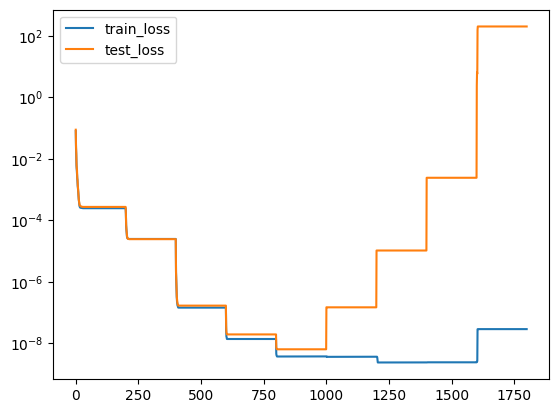

In [3]:
for grid in grid_finer:
    new_model = KAN(G = grid, k = 3, width = [2, 1, 1], device="cuda")
    if(old_model != None):
        new_model.initial_grid_from_other_model(old_model, train_data[0])
        #new_model.plot()
    #optim = torch.optim.Adam(new_model.parameters(), lr = learning_rate)
    optim = torch.optim.LBFGS(new_model.parameters(), lr = 1, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32)
    loss_func = torch.nn.MSELoss()
    start_time = time.time()
    train_loss_list, test_loss_list = new_model.train_model(train_data, test_data, optimizer = optim, loss_func = loss_func, epochs=200, stop_grid=5, is_LBFGS = True)
    end_time = time.time()
    train_plot += train_loss_list
    test_plot += test_loss_list
    
    #new_model.plot()
    old_model = new_model
    
    print("#-------------------Evaluate-------------------#")
    print(f"grid: {grid} train_loss: {train_loss_list[-1]} test_loss: {test_loss_list[-1]}")
    
    time_arr.append(end_time - start_time)
    print(f"time: {end_time - start_time}")
    
plt.plot([i for i in range(len(train_plot))], train_plot, label="train_loss")
plt.plot([i for i in range(len(test_plot))], test_plot, label="test_loss")
plt.yscale('log', base=10)
plt.legend()
plt.show();

In [4]:
train_plot1 = train_plot
test_plot1 = test_plot
time1 = time_arr

In [8]:
grid_finer = [3, 5, 10, 20, 50, 100, 200, 500, 1000]
old_model = None
train_plot = []
test_plot = []
time_arr = []

description:   0%|                                                          | 0/200 [00:00<?, ?it/s]

loss: 3.0729902391612995e-06: 100%|███████████████████████████████| 200/200 [01:02<00:00,  3.20it/s]


#-------------------Evaluate-------------------#
grid: 3 train_loss: 3.0729902391612995e-06 test_loss: 3.6760393413715065e-06
time: 62.54784870147705


loss: 8.866210237101768e-07: 100%|████████████████████████████████| 200/200 [00:27<00:00,  7.31it/s]


#-------------------Evaluate-------------------#
grid: 5 train_loss: 8.866210237101768e-07 test_loss: 9.271853969039512e-07
time: 27.362037897109985


loss: 1.2442218633168523e-07: 100%|███████████████████████████████| 200/200 [00:19<00:00, 10.00it/s]


#-------------------Evaluate-------------------#
grid: 10 train_loss: 1.2442218633168523e-07 test_loss: 1.4329715725125425e-07
time: 19.998744249343872


loss: 5.392695712203022e-08: 100%|████████████████████████████████| 200/200 [00:18<00:00, 10.71it/s]


#-------------------Evaluate-------------------#
grid: 20 train_loss: 5.392695712203022e-08 test_loss: 8.0520003109541e-08
time: 18.683449745178223


loss: 4.537486830713533e-08: 100%|████████████████████████████████| 200/200 [00:18<00:00, 10.89it/s]


#-------------------Evaluate-------------------#
grid: 50 train_loss: 4.537486830713533e-08 test_loss: 2.6764470817397523e-07
time: 18.365360975265503


loss: 3.375888724121978e-08: 100%|████████████████████████████████| 200/200 [00:19<00:00, 10.39it/s]


#-------------------Evaluate-------------------#
grid: 100 train_loss: 3.375888724121978e-08 test_loss: 5.5474638429586776e-06
time: 19.258768796920776


loss: 2.5338090736681806e-08: 100%|███████████████████████████████| 200/200 [00:39<00:00,  5.03it/s]


#-------------------Evaluate-------------------#
grid: 200 train_loss: 2.5338090736681806e-08 test_loss: 2.0749981558765285e-05
time: 39.79816722869873


loss: 8.146928465180281e-09: 100%|████████████████████████████████| 200/200 [01:14<00:00,  2.67it/s]


#-------------------Evaluate-------------------#
grid: 500 train_loss: 8.146928465180281e-09 test_loss: 0.000142967575811781
time: 75.0030927658081


loss: nan: 100%|██████████████████████████████████████████████████| 200/200 [09:53<00:00,  2.97s/it]


#-------------------Evaluate-------------------#
grid: 1000 train_loss: nan test_loss: nan
time: 593.3056783676147


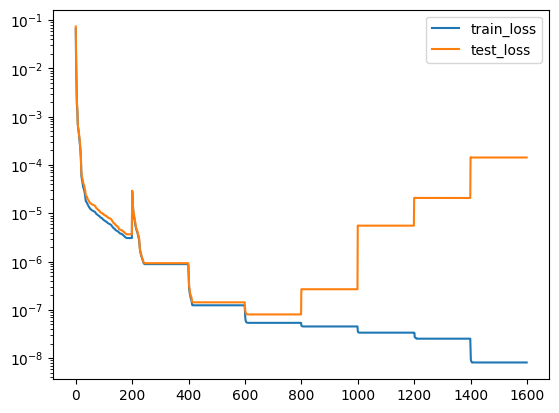

In [9]:
for grid in grid_finer:
    new_model = KAN(G = grid, k = 3, width = [2, 5, 1], device="cuda")
    if(old_model != None):
        new_model.initial_grid_from_other_model(old_model, train_data[0])
        #new_model.plot()
    #optim = torch.optim.Adam(new_model.parameters(), lr = learning_rate)
    optim = torch.optim.LBFGS(new_model.parameters(), lr = 1, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32)
    loss_func = torch.nn.MSELoss()
    start_time = time.time()
    train_loss_list, test_loss_list = new_model.train_model(train_data, test_data, optimizer = optim, loss_func = loss_func, epochs=200, stop_grid=5, is_LBFGS = True)
    end_time = time.time()
    train_plot += train_loss_list
    test_plot += test_loss_list
    
    #new_model.plot()
    old_model = new_model
    
    time_arr.append(end_time - start_time)
    print("#-------------------Evaluate-------------------#")
    print(f"grid: {grid} train_loss: {train_loss_list[-1]} test_loss: {test_loss_list[-1]}")
    print(f"time: {end_time - start_time}")
    
plt.plot([i for i in range(len(train_plot))], train_plot, label="train_loss")
plt.plot([i for i in range(len(test_plot))], test_plot, label="test_loss")
plt.yscale('log', base=10)
plt.legend()
plt.show();

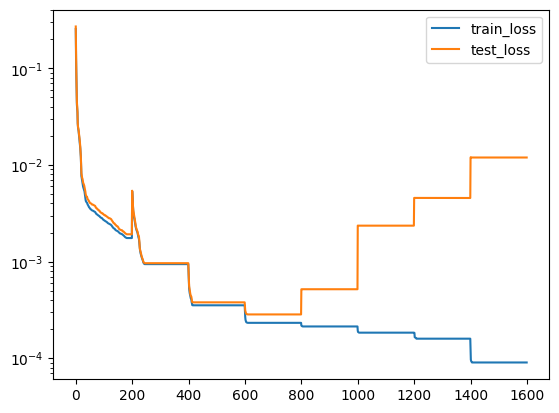

In [10]:
#fig1 
plt.plot([i for i in range(len(train_plot))], [math.sqrt(val) for val in train_plot], label="train_loss")
plt.plot([i for i in range(len(test_plot))], [math.sqrt(val) for val in test_plot], label="test_loss")
plt.yscale('log', base=10)
plt.legend()
plt.show();

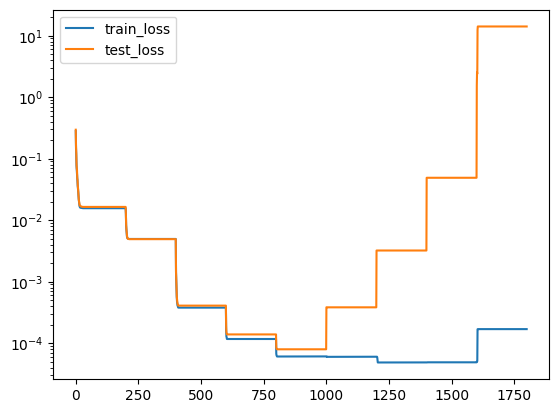

In [11]:
#fig2
plt.plot([i for i in range(len(train_plot1))], [math.sqrt(val) for val in train_plot1], label="train_loss")
plt.plot([i for i in range(len(test_plot1))], [math.sqrt(val) for val in test_plot1], label="test_loss")
plt.yscale('log', base=10)
plt.legend()
plt.show();

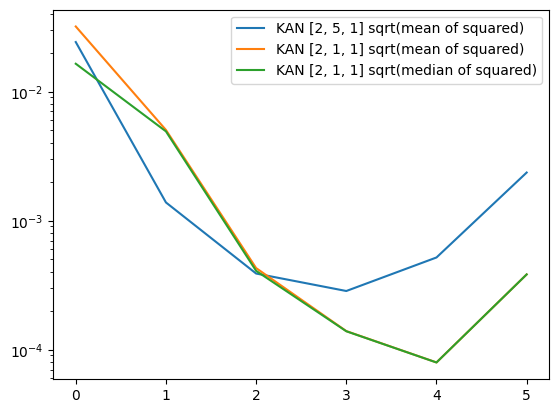

In [24]:
MOS_kan251 = [sum(test_plot[i * 200: i * 200 + 200]) / 200 for i in range(6)] 
plt.plot([i for i in range(6)], [math.sqrt(val) for val in MOS_kan251], label="KAN [2, 5, 1] sqrt(mean of squared)")
MOS_kan211 = [sum(test_plot1[i * 200: i * 200 + 200]) / 200 for i in range(6)] 
plt.plot([i for i in range(6)], [math.sqrt(val) for val in MOS_kan211], label="KAN [2, 1, 1] sqrt(mean of squared)")
MOS_kan211 = [sorted(test_plot1[i * 200: i * 200 + 200])[100] for i in range(6)] 
plt.plot([i for i in range(6)], [math.sqrt(val) for val in MOS_kan211], label="KAN [2, 1, 1] sqrt(median of squared)")
plt.yscale('log', base=10)
plt.legend()
plt.show();

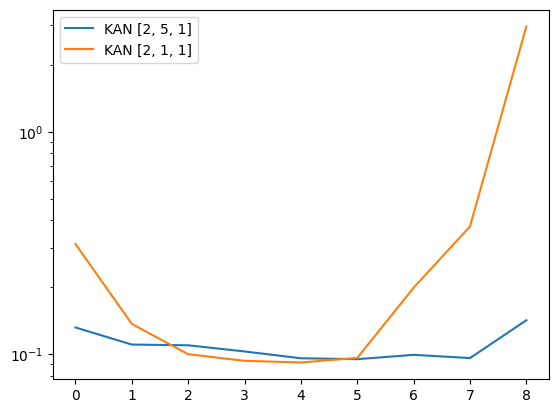

In [25]:
time1 = [val / 200 for val in time1]
plt.plot([i for i in range(int(len(test_plot1) / 200))], time1, label="KAN [2, 5, 1]")
time_arr = [val / 200 for val in time_arr]
plt.plot([i for i in range(int(len(test_plot) / 200))], time_arr, label="KAN [2, 1, 1]")
plt.yscale('log', base=10)
plt.legend()
plt.show();